#### 통계 vs 머신러닝 데이터분석
- 통계     : 분석하는 사람의 능력이 중요
- 머신러닝 : 상대적으로 사람의 역할이 축소(기계가 스스로 규칙을 세워서 학습)
- 딥러닝   : 사람의 개입이 최소화(데이터가 훨씬 복잡해지기 때문)

#### 일반화, 과대적합, 과소적합
- 어떤 데이터가 들어와도 잘 맞출 수 있는 '일반화'된 모델
- 과대적합: 훈련데이터에 학습이 너무 과도하게 된 경우
- 과소적합: 학습이 충분히 이루어지지 않은 경우

#### 모델의 일반화를 위한 행동
- 데이터측면: 데이터의 양을 많게 준비, 다양한 데이터, 편중되지 않은 데이터 준비
- 모델  측면: 모델의 복잡도를 제어
    - KNN    : 이웃의 숫자
    - Tree   : 깊이, 리프노드의 숫자를 제어하는 파라미터
    - linear : 가중치 제어(규제) -> L1, L2

#### 머신러닝 프로세스
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석 (EDA)
5. 모델선택 및 하이퍼파라미터 튜닝
    - KNN : 추천시(유사도 판별하여)
    - Tree : 앙상블(단독트리보다는 앙상블모델 많이 활용)(텍스트분석시는 많이사용X)
    - 선형모델: 여러군데 써도 됨~ svm, ..
    - 나이브베이즈 : 확률 (생각보다ㄱㅊ)
    - 군집 : 비슷한 데이터를 묶어주기에 '라벨링'시에도 활용 가능
    - 차원축소 : 유의미한 특성만남게 줄여주는 것
6. 학습
7. 평가
    - 회귀 : 오차(예측값과 실제값의 차이)기반으로 평가
        - MSE(오차의제곱(error가 클수록 더 많은 penalty) 평균을 내서 오차 측정), MAE, RMSE, RMSLE<특수케이스>, MAPE, ...
    - 분류 : 맞춘 갯수 기반으로 평가
            - 양성: '내가' 좀 더 관심을 가지는 클래스
            - 음성: 그 반대의 클래스(클래스들)
        - Accuracy (정확도): 모델이 전체 중 몇개나 맞췄는지 ....................................100명환자 95명암x 5명암o 일때 acc=95%
        - Recall   (재현율): 실제(=실제정답 y_test)(암환자5명) 양성 중에 정확히 맞춘(0명) 비율............암o이 양성일 때 0%(==0/5 %)
        - Precision(정밀도): 예측(=모델이X_test 만들어낸 정답결과) 양성(0명) 중에 정확히 맞춘(0명) 비율.. 암o이 양성일 때 0%(==0/0 %)
        - F1-score 
        - ROC curve
        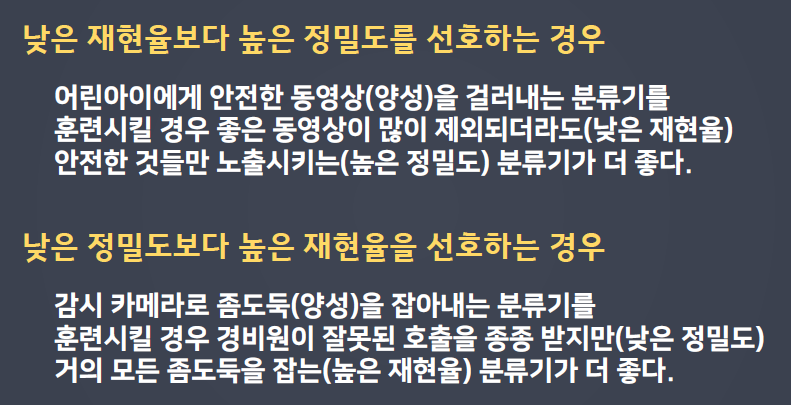

### 실습
- iris 데이터를 활용해서 품종을 분류해보자.
- 상관관계 확인
- 시각화
- 하이퍼파라미터 튜닝

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  # 훈련셋과 테스트셋 분리
from sklearn.model_selection import cross_val_score   # 교차검증
from sklearn import metrics                           # 평가

#### 1.문제 정의
- iris 품종을 분류(꽃의 4가지 특성)
- 품종 3개 (클래스: 3개)

#### 2.데이터 수집
- sklearn 라이브러리의 연습용 데이터셋 활용

In [2]:
iris_data = load_iris()

In [3]:
iris_data.keys() #특성(문제), 정답, 정답의 명칭, 데이터설명, 특성의 명칭, 파일명은 굳이..

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### 3. 전처리
- 결측치 있는지? 확인
- 문자데이터 있는지? 확인  
    - ==> 있다면 수치데이터로 변경(머신러닝_ 숫자기반의 알고리즘으로 학습가능 하기 때문)
- 스케일링(각 특성 비슷하게/ 척도 비슷하게 만들기)
    - *Min Max Scaler
    - 딥러닝에서는 성능을 높이기 위해서 일부러 (e.g.,)0~1사이의 값으로 만들기도 함
    - e.g., 키도 몸무게도 시력도 0~1 사이로 만드는 것
    - 척도에 대해 신경쓰지 않는 모델도 있음(tree모델_ 특성 하나씩만 가지고 모델 만들어나가기 때문)

In [4]:
iris_df = pd.DataFrame(iris_data['data'],
                      columns = iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- 결측치 없다
- 문자 데이터도 없다
- scale도 똑같이 cm로 구성

#### 4.데이터 탐색(EDA) - 시각화
- 데이터의 모양(shape)
- 정답 데이터의 클래스 종류/비율 확인해봐도 좋고  -> 한쪽편중보단 비율비슷한게 좋다
- 정답 데이터와 관련이 있는 특성이 무엇이 있는지
- 기술통계

In [6]:
iris_df.shape

(150, 4)

In [7]:
y = pd.Series(iris_data['target']) #pd의 1차원 출력 series
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [8]:
y.value_counts()     #cf. 한쪽 클래스가 많은 경우, 해당 클래스를 더 학습하려 함. 그러기에 최대한 비슷한 경우 골고루 맞추기 쉬움

2    50
1    50
0    50
dtype: int64

In [9]:
iris_df['label'] = y    #특정컬럼에 대입연산자 사용하면 해당컬럼있는경우는 덮어씌우고, 없는경우는 마지막에 컬럼생성함

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris_df.corr() #상관관계(: 두 변수 사이의 관계를 수치화)  (가로 혹은 세로 중 한쪽만 보면 됨)
                        # 두 변수가   비례(양의 상관관계)  ==>  1에 가깝게 (가까워질 수록 상관관계 짙어진다!!)
                        # 두 변수가 반비례(음의 상관관계)  ==> -1에 가깝게
        #1이던 -1이던 가까운 데이터 중요~!

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


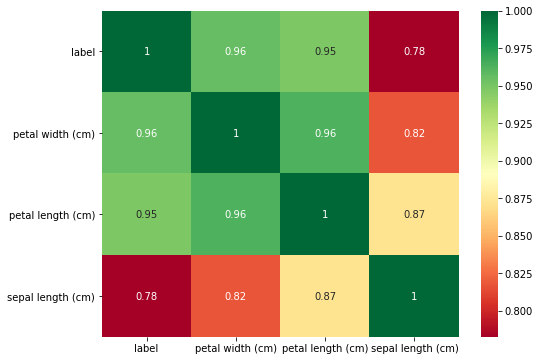

In [12]:
import seaborn as sns

corr = iris_df.corr() #corr()함수로 훈련데이터셋 내 모든 변수들의 상관관계 확인
top_corr = iris_df[corr.nlargest(4,'label').index].corr() #타켓과 상관관계 큰 값의 인덱스를 차례로 40개 저장
    #(상관관계높은순서대로 출력할갯수n, '이 특성을 기준으로!열').index 출력

figure, ax1 = plt.subplots(nrows=1, ncols=1) #1행1열로~~
figure.set_size_inches(8,6)

sns.heatmap(top_corr, annot=True, ax=ax1, cmap='RdYlGn') #annot=True이면 셀 안에 각각의 데이터값 출력

In [13]:
iris_df.describe() # 기술통계

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


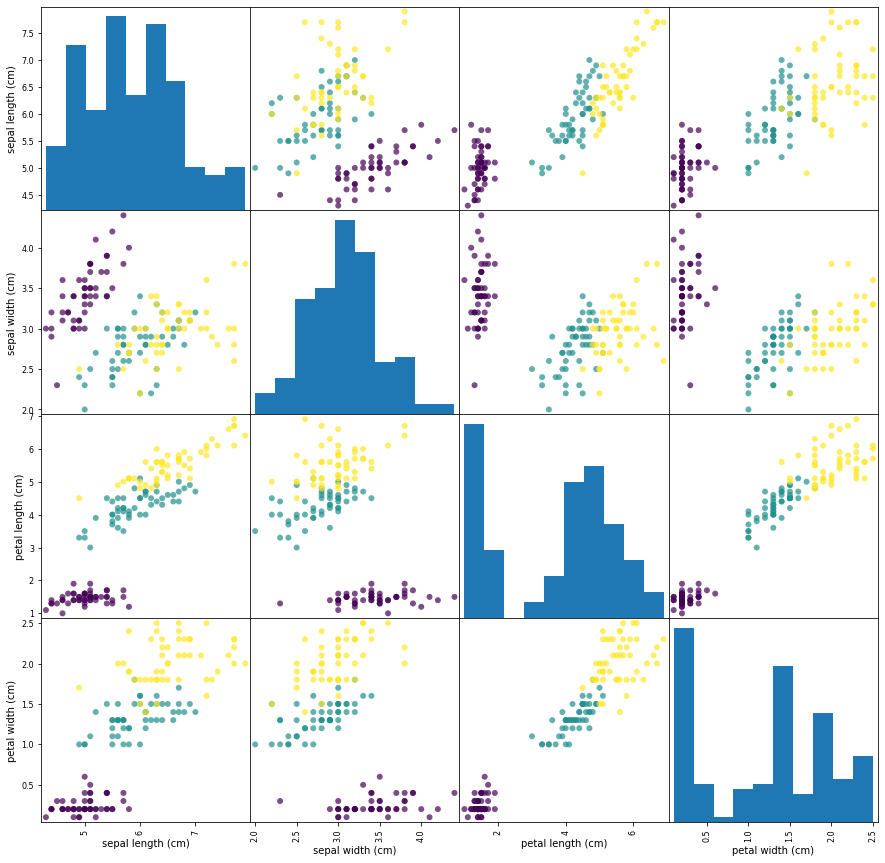

In [14]:
#시각화
pd.plotting.scatter_matrix(iris_df.drop('label', axis=1),
                          figsize=(15,15), #가로세로비율
                          marker='o',
                          alpha = 0.7, #0:완전투명, 1:불투명     ##약간의 투명도를 주면 점이 겹쳤는지 안겹쳤는지 볼 수 있음
                          c = y ) #기본 색상환->virdis           ##색은 같은 데이터끼리(정답같은것끼리)~
plt.show()

#### 5. 모델링(모델선택, 하이퍼파라미터 튜닝)
- KNN모델 확인
- 이웃의 숫자 => 튜닝 해보자~!

In [15]:
# train : 70%, test : 30 %  
##(학습충분히 못해서 과소적합처럼 보일때는 train을 더 늘릴 때도 있음 _ 무조건 과소적합이 저 이유때문만은 아님)
###-> 과소적합에서 일반화 시키려는 방법 중 하나에 해당

## 의도적으로 test셋 늘린다? ==> 내 모델의 평가를 좀 더 정확히 해보는 것(내 모델의 신뢰도를 더 높여보려는 것이 목적)
## 신뢰도를 높여보고자 하는 방법 중 1 ==>  테스트를 여러 번 해봄(여러 테스트셋을 만들어서!!) ======> 내 테스트셋을 여러 모델로 여러번 평가해주는 효과 보여주는 교차검증론
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'],
                                                   iris_data['target'],
                                                   test_size = 0.3,
                                                   random_state = 88) #랜덤샘플링방식 ##(==고정핀)

In [16]:
train_score_list = []
test_score_list = []

for k in range(1,99,2) : # 이웃의 숫자를 바꿔보자 (=모델의 복잡도를 변경)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    ##평가할거면 점수 측정해봐야지?
    #점수
    train_score = knn_model.score(X_train, y_train) 
    test_score = knn_model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

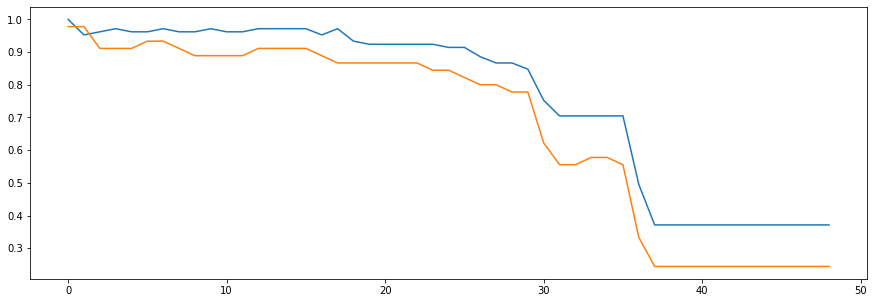

In [17]:
plt.figure(figsize=(15,5))
plt.plot(train_score_list)
plt.plot(test_score_list)
plt.show()

#### 교차검증

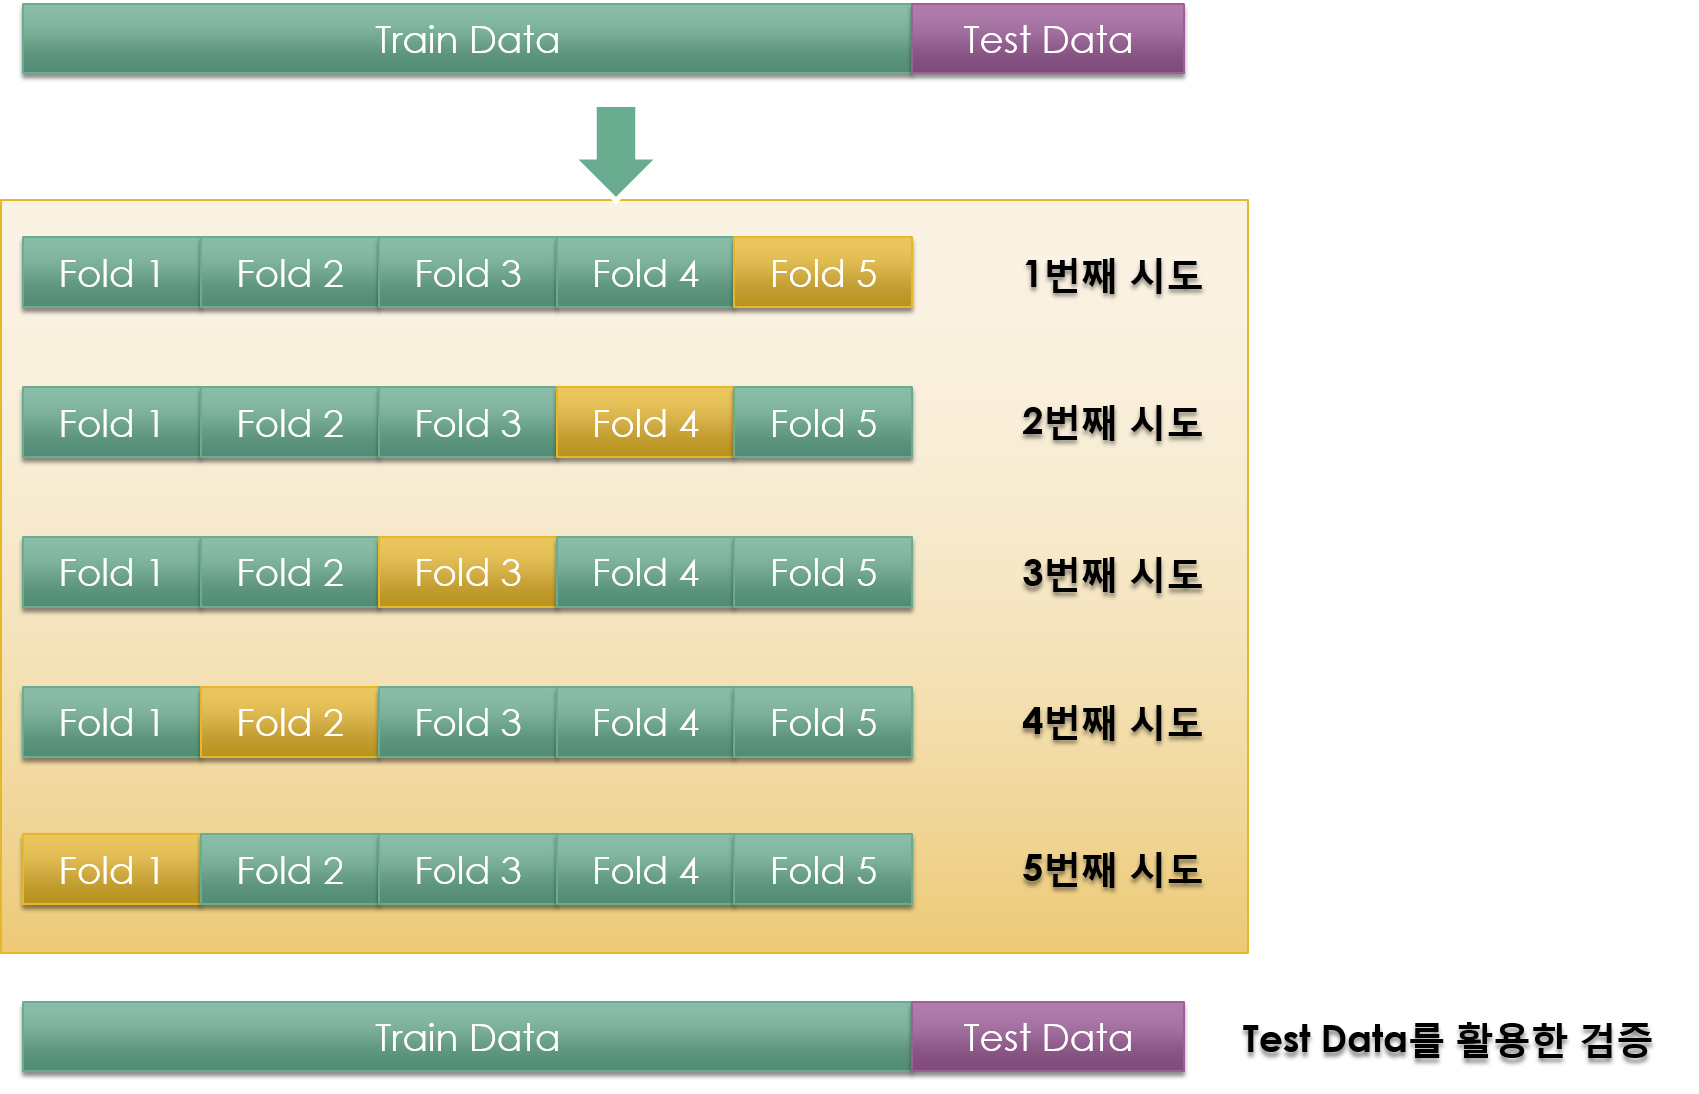